# Data Cleaning & Preprocessing
**Developer**: Jinwoo Oh

---

**Product Manager Accelerator**

The Product Manager Accelerator Program is designed to support PM professionals through every stage of their careers. From students looking for entry-level jobs to Directors looking to take on a leadership role, our program has helped over hundreds of students fulfill their career aspirations. Our Product Manager Accelerator community are ambitious and committed. Through our program they have learnt, honed and developed new PM and leadership skills, giving them a strong foundation for their future endeavors.

Website: https://www.pmaccelerator.io/ | LinkedIn: https://www.linkedin.com/school/pmaccelerator/

## Table of Contents

1. [Imports & Setup](#1-imports--setup)
2. [Load Data](#2-load-data)
3. [Data Type Conversion](#3-data-type-conversion)
4. [Missing Value Analysis](#4-missing-value-analysis)
5. [Remove Duplicate Unit Columns](#5-remove-duplicate-unit-columns)
6. [Outlier Detection & Handling](#6-outlier-detection--handling)
7. [Normalization Demo](#7-normalization-demo)
8. [Save Cleaned Data](#8-save-cleaned-data)
9. [Summary](#9-summary)

## 1. Imports & Setup

Import all required libraries and configure the environment for reproducibility and clean output.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
import os

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

# Reproducibility
np.random.seed(42)

# Ensure output directories exist
os.makedirs('../outputs/figures', exist_ok=True)

print('Setup complete.')

Setup complete.


## 2. Load Data

Load the Global Weather Repository dataset and perform an initial inspection to understand its structure, size, and contents.

In [32]:
df = pd.read_csv('../data/GlobalWeatherRepository.csv')

print('Dataset shape:', df.shape)
print('\n--- First 5 Rows ---')
df.head()

Dataset shape: (124721, 41)

--- First 5 Rows ---


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [33]:
print('--- Data Info ---')
df.info()

--- Data Info ---
<class 'pandas.DataFrame'>
RangeIndex: 124721 entries, 0 to 124720
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       124721 non-null  str    
 1   location_name                 124721 non-null  str    
 2   latitude                      124721 non-null  float64
 3   longitude                     124721 non-null  float64
 4   timezone                      124721 non-null  str    
 5   last_updated_epoch            124721 non-null  int64  
 6   last_updated                  124721 non-null  str    
 7   temperature_celsius           124721 non-null  float64
 8   temperature_fahrenheit        124721 non-null  float64
 9   condition_text                124721 non-null  str    
 10  wind_mph                      124721 non-null  float64
 11  wind_kph                      124721 non-null  float64
 12  wind_degree                   124721 

In [34]:
print('--- Descriptive Statistics ---')
df.describe()

--- Descriptive Statistics ---


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,124721.000000,124721.000000,1.247210e+05,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000,124721.000000
mean,19.193490,21.992096,1.743601e+09,21.607207,70.894723,8.069774,12.990642,169.241948,1014.053503,29.944345,0.136926,0.005195,66.138501,40.054041,22.503596,72.500496,9.518929,5.623832,3.443413,11.378056,18.313128,476.647246,58.932522,15.256413,10.680584,24.598199,49.231358,1.710057,2.633855,49.620938
std,24.425953,65.793159,1.600983e+07,9.587039,17.256526,7.371973,11.860981,103.448265,10.616979,0.313481,0.571573,0.022591,24.020442,34.078375,11.459646,20.624924,2.669897,1.668252,3.565599,8.705602,14.010257,782.702069,31.136430,24.282619,36.972602,37.853030,151.999242,0.950647,2.472296,35.042022
min,-41.300000,-175.200000,1.715849e+09,-29.800000,-21.600000,2.200000,3.600000,1.000000,947.000000,27.960000,0.000000,0.000000,2.000000,0.000000,-36.700000,-34.000000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.729761e+09,16.300000,61.300000,3.800000,6.100000,80.000000,1010.000000,29.830000,0.000000,0.000000,50.000000,0.000000,16.300000,61.300000,10.000000,6.000000,0.100000,6.400000,10.400000,210.900000,39.000000,1.650000,1.050000,7.100000,10.050000,1.000000,1.000000,15.000000
50%,17.250000,23.240000,1.743584e+09,24.100000,75.400000,6.900000,11.200000,162.000000,1014.000000,29.930000,0.000000,0.000000,71.000000,31.000000,25.300000,77.600000,10.000000,6.000000,2.100000,9.600000,15.500000,303.400000,56.000000,5.450000,2.450000,14.245000,20.300000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.757492e+09,28.100000,82.600000,11.000000,17.600000,256.000000,1018.000000,30.060000,0.030000,0.000000,85.000000,75.000000,30.100000,86.200000,10.000000,6.000000,6.000000,15.100000,24.300000,473.600000,75.000000,17.760000,8.650000,28.120000,42.180000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.771311e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.300000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


## 3. Data Type Conversion

Convert `last_updated` from string to datetime format. This column serves as the primary time series axis throughout the project.

In [35]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

print('last_updated dtype:', df['last_updated'].dtype)
print('Date range: {} to {}'.format(df['last_updated'].min(), df['last_updated'].max()))

last_updated dtype: datetime64[us]
Date range: 2024-05-16 01:45:00 to 2026-02-17 19:45:00


## 4. Missing Value Analysis

Check for missing values across all columns. If present, I apply median imputation for numeric columns and drop any column with more than 50% missing data.

In [36]:
# Calculate missing values
missing_count = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_pct
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
print('Columns with missing values:')
print(missing_df)
print(f'\nTotal columns with missing data: {len(missing_df)}')

Columns with missing values:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Total columns with missing data: 0


In [37]:
# Visualize missing values
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(missing_df.index, missing_df['Missing %'], color=plt.cm.viridis(np.linspace(0.3, 0.9, len(missing_df))))
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_ylabel('Column')
    ax.set_title('Missing Values by Column (%)')
    # Add percentage labels on bars
    for bar, pct in zip(bars, missing_df['Missing %']):
        ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
                f'{pct:.1f}%', va='center', fontsize=9)
    plt.tight_layout()
    plt.savefig('../outputs/figures/missing_values.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print('No missing values found.')

No missing values found.


In [38]:
# Handle missing values
print('Shape before missing value treatment:', df.shape)

# Drop columns with >50% missing
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
if cols_to_drop:
    print(f'Dropping columns with >50% missing: {cols_to_drop}')
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print('No columns with >50% missing values.')

# Median impute air quality columns
air_quality_cols = [col for col in df.columns if col.startswith('air_quality')]
for col in air_quality_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        print(f'  Median imputed: {col}')

# Median impute any remaining numeric columns with missing values
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
for col in remaining_missing.index:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
        print(f'  Median imputed (other): {col}')

# Verify no missing values remain
total_missing = df.isnull().sum().sum()
print(f'\nTotal missing values after treatment: {total_missing}')
print('Shape after missing value treatment:', df.shape)

Shape before missing value treatment: (124721, 41)
No columns with >50% missing values.

Total missing values after treatment: 0
Shape after missing value treatment: (124721, 41)


## 5. Remove Duplicate Unit Columns

The dataset contains measurements in both metric and imperial units. I keep only the metric versions (Celsius, kph, mb, mm, km) to eliminate redundancy and reduce dimensionality.

In [39]:
print('Shape before dropping duplicate unit columns:', df.shape)

cols_to_remove = [
    'temperature_fahrenheit',
    'feels_like_fahrenheit',
    'wind_mph',
    'gust_mph',
    'pressure_in',
    'precip_in',
    'visibility_miles'
]

# Only drop columns that exist in the dataframe
cols_existing = [c for c in cols_to_remove if c in df.columns]
df.drop(columns=cols_existing, inplace=True)

print('Shape after dropping duplicate unit columns:', df.shape)
print(f'\nDropped {len(cols_existing)} columns: {cols_existing}')
print(f'\nRemaining columns ({len(df.columns)}):')
print(list(df.columns))

Shape before dropping duplicate unit columns: (124721, 41)
Shape after dropping duplicate unit columns: (124721, 34)

Dropped 7 columns: ['temperature_fahrenheit', 'feels_like_fahrenheit', 'wind_mph', 'gust_mph', 'pressure_in', 'precip_in', 'visibility_miles']

Remaining columns (34):
['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


## 6. Outlier Detection & Handling

Use the IQR (Interquartile Range) method to detect outliers in key numeric features. Outliers are capped (clipped) at the IQR bounds rather than removed, preserving dataset size while reducing extreme value influence.

In [40]:
outlier_cols = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph']

# Calculate IQR bounds and count outliers
outlier_info = {}
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_info[col] = {
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
        'Lower Bound': lower, 'Upper Bound': upper,
        'Outlier Count': n_outliers
    }
    print(f'{col}: {n_outliers} outliers (bounds: [{lower:.2f}, {upper:.2f}])')

print(f'\nTotal outliers detected: {sum(v["Outlier Count"] for v in outlier_info.values())}')

temperature_celsius: 2639 outliers (bounds: [-1.40, 45.80])
humidity: 0 outliers (bounds: [-2.50, 137.50])
pressure_mb: 3921 outliers (bounds: [998.00, 1030.00])
wind_kph: 2172 outliers (bounds: [-11.15, 34.85])

Total outliers detected: 8732


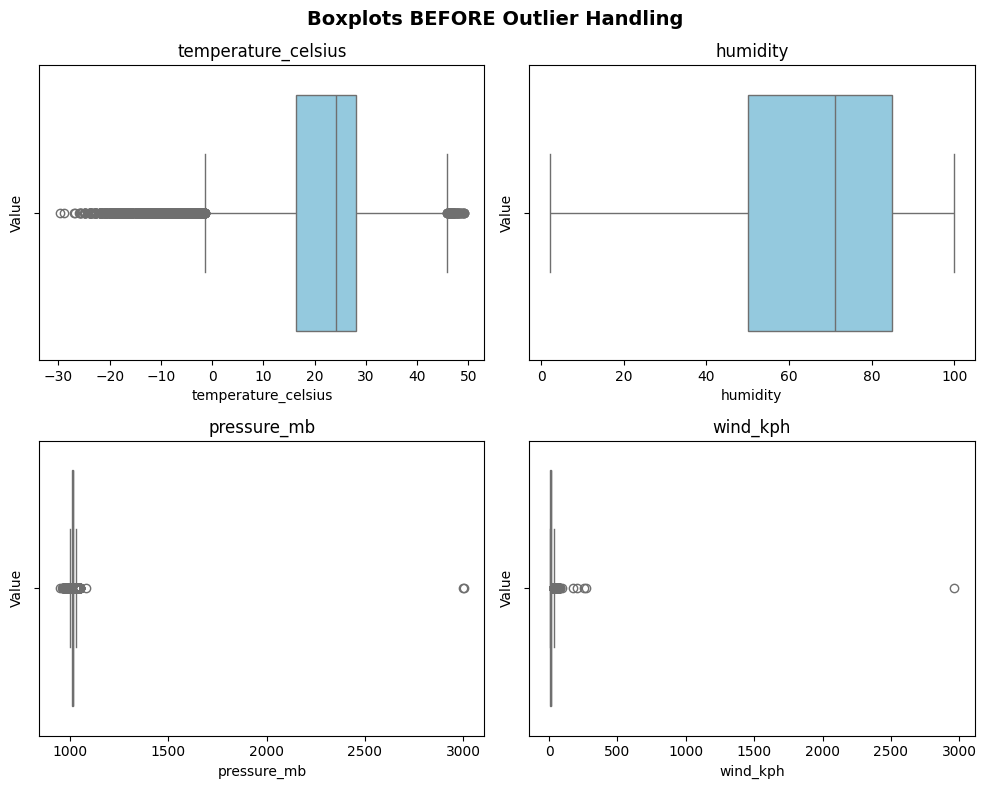

In [41]:
# Boxplots BEFORE outlier handling
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Boxplots BEFORE Outlier Handling', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), outlier_cols):
    sns.boxplot(x=df[col], ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('../outputs/figures/outliers_before.png', dpi=150, bbox_inches='tight')
plt.show()

In [42]:
# Cap outliers at IQR bounds
for col in outlier_cols:
    info = outlier_info[col]
    df[col] = df[col].clip(lower=info['Lower Bound'], upper=info['Upper Bound'])

print('Outliers capped at IQR bounds.')
print('Shape after outlier handling:', df.shape)

Outliers capped at IQR bounds.
Shape after outlier handling: (124721, 34)


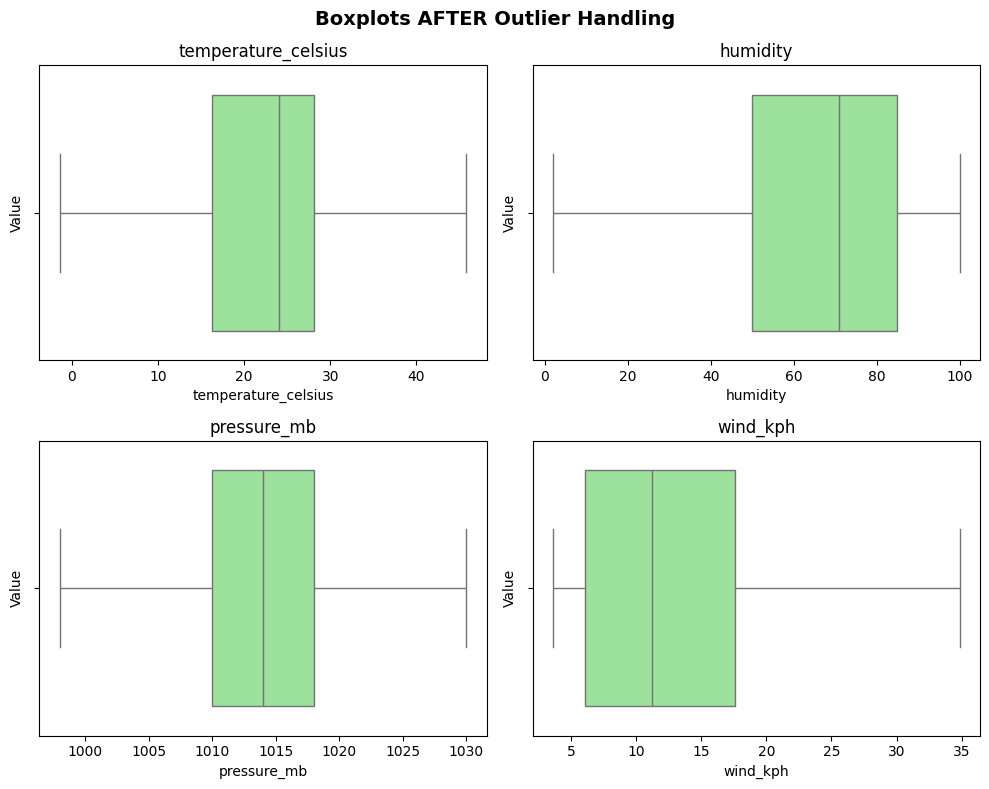

In [43]:
# Boxplots AFTER outlier handling
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Boxplots AFTER Outlier Handling', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), outlier_cols):
    sns.boxplot(x=df[col], ax=ax, color='lightgreen')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('../outputs/figures/outliers_after.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Normalization Demo

I use `StandardScaler` (z-score normalization) to show how features can be scaled to have zero mean and unit variance. This is important for models sensitive to feature scale (e.g., linear regression, neural networks). The normalized values are **not** added to the saved dataset. Normalization is demonstrated here for reference and will be applied fresh during the forecasting step.

In [44]:
norm_cols = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph']

scaler = StandardScaler()
normalized_values = scaler.fit_transform(df[norm_cols])
normalized_df = pd.DataFrame(normalized_values, columns=[f'{c}_normalized' for c in norm_cols])

# Side-by-side comparison: original vs normalized (first 5 rows)
comparison = pd.concat([
    df[norm_cols].head().reset_index(drop=True),
    normalized_df.head()
], axis=1)

print('Original vs Normalized (first 5 rows):')
comparison

Original vs Normalized (first 5 rows):


,temperature_celsius,humidity,pressure_mb,wind_kph,temperature_celsius_normalized,humidity_normalized,pressure_mb_normalized,wind_kph_normalized
0,26.6,24,1012.0,13.3,0.528252,-1.754284,-0.309151,0.053708
1,19.0,94,1012.0,11.2,-0.294741,1.159912,-0.309151,-0.208272
2,23.0,29,1011.0,15.1,0.138413,-1.546127,-0.460820,0.278263
3,6.3,61,1007.0,11.9,-1.670006,-0.213923,-1.067495,-0.120946
4,26.0,89,1011.0,13.0,0.463279,0.951756,-0.460820,0.016282


## 8. Save Cleaned Data

Save the cleaned dataset to CSV for use in subsequent notebooks. The normalized columns are **not** included - only the cleaned original features are saved.

In [45]:
df.to_csv('../data/cleaned_weather.csv', index=False)

print('Cleaned data saved to ../data/cleaned_weather.csv')
print(f'\nFinal shape: {df.shape}')
print(f'\nData types:')
print(df.dtypes)
print(f'\nColumn list ({len(df.columns)}):')
print(list(df.columns))

Cleaned data saved to ../data/cleaned_weather.csv

Final shape: (124721, 34)

Data types:
country                                    str
location_name                              str
latitude                               float64
longitude                              float64
timezone                                   str
last_updated_epoch                       int64
last_updated                    datetime64[us]
temperature_celsius                    float64
condition_text                             str
wind_kph                               float64
wind_degree                              int64
wind_direction                             str
pressure_mb                            float64
precip_mm                              float64
humidity                                 int64
cloud                                    int64
feels_like_celsius                     float64
visibility_km                          float64
uv_index                               float64
gust_kph         

## 9. Summary

### Steps Performed

1. **Loaded** the Global Weather Repository dataset and inspected its structure (shape, dtypes, descriptive statistics).
2. **Converted** `last_updated` from string to datetime format for time series analysis.
3. **Checked for missing values**: no columns had any missing data, so no imputation was needed. The median imputation logic was included as a safeguard but was not triggered.
4. **Removed 7 duplicate unit columns** (Fahrenheit, mph, inches, miles equivalents) to eliminate redundancy.
5. **Detected outliers** using the IQR method on temperature, humidity, pressure, and wind speed. Outliers were capped at IQR bounds to preserve data while reducing extreme values.
6. **Demonstrated normalization** using StandardScaler (z-score scaling) on key numeric features. Normalized values are not saved. Normalization will be applied fresh during the forecasting step.
7. **Saved** the cleaned dataset to `../data/cleaned_weather.csv` for use in subsequent analysis.

### Key Statistics
- Duplicate unit columns removed: 7
- Missing values: none found in any column
- Outliers: capped at IQR bounds for temperature, humidity, pressure, and wind speed

### Next Steps
The cleaned dataset is ready for exploratory data analysis in `02_eda.ipynb`, where I will explore distributions, trends, correlations, and perform anomaly detection.